# Grouping of customers by energy consumption

I will perform a clustering of customers based on energy consumption to discover possible patterns.

In [109]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analyses

In [110]:
# Reading the dataset

data = pd.read_csv(r'..\data\consumo_energia.csv', delimiter = ';')

In [111]:
dataframe = pd.DataFrame(data)

In [112]:
# Dataset dimesions
dataframe.shape

(2075259, 9)

In [113]:
# General info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [114]:
# First five rows
dataframe.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [115]:
# Last five rows
dataframe.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [116]:
# Data Type
dataframe.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [117]:
# Checking missing values
print(dataframe.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [118]:
# The first two columns won't be used
dataset  = dataframe.iloc[0: , 2:9].dropna()

In [119]:
# Changing column type
cols_to_convert = [
    'Voltage',
    'Global_active_power',
    'Global_reactive_power',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

dataset[cols_to_convert] = dataset[cols_to_convert].astype('float64')

In [120]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [121]:
# Checking missing values
print(dataset.isnull().any())

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool


In [122]:
# Variables attributes
df_attributes = dataset.values

In [123]:
# Dataset values
df_attributes

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      shape=(2049280, 7))

In [124]:
# model train size
sample_one, sample_two = train_test_split(df_attributes, train_size= .01)

In [125]:
# Sample dimensions
sample_one.shape

(20492, 7)

In [126]:
# Dimension reduction by PCA
pca = PCA(n_components = 2).fit_transform(sample_one)

In [127]:
#Range for K
k_range = range(1, 12)

In [128]:
# Fits KMeans models for each 'k' in 'k_range' to 'pca' data.
K_Means = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [129]:
# Finding centroids of the clusters.
centroids = [C.cluster_centers_ for C in K_Means]

In [130]:
# Calculates Euclidean distances from data points ('pca') to all centroids for each 'k'.
euclid_dist = [cdist(pca, centroid, 'euclidean') for centroid in centroids]
# Finds the minimum distance for each data point to its closest centroid per 'k'.
dist = [np.min(i, axis = 1) for i in euclid_dist]

In [131]:
# Distances within each cluster
intra_sum = [sum( d ** 2) for d in dist]
# Total sum of squared pairwise distances (normalized)
total_sum = np.sum(pdist(pca) ** 2) / pca.shape[0]
# Inter-cluster distance sum
inter_sum = total_sum - intra_sum

Elbow plots are used in the KMeans algorithm to help choose the optimal number of clusters (k). They show how the within-cluster variance (inertia) decreases as k increases. Initially, adding more clusters greatly reduces this variance, but after a certain point (the "elbow"), the improvement becomes marginal. This point suggests a good balance between model simplicity and accuracy — the optimal k.

Text(0.5, 1.0, 'Explained Variance x K Value')

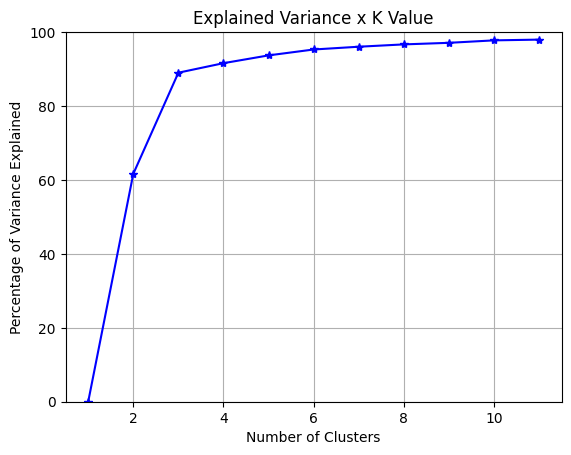

In [ ]:
# Elbow plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, inter_sum/total_sum * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Variance Explained')
plt.title('Explained Variance x K Value')

In [134]:
first_model = KMeans(n_clusters = 8)
first_model.fit(pca)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [137]:
# Define the x-axis limits based on the first principal component
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1

# Define the y-axis limits based on the second principal component
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

# Create a mesh grid of points covering the PCA-reduced 2D space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the cluster label for each point in the grid using the trained model
Z = first_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the prediction results to match the shape of the mesh grid
Z = Z.reshape(xx.shape)


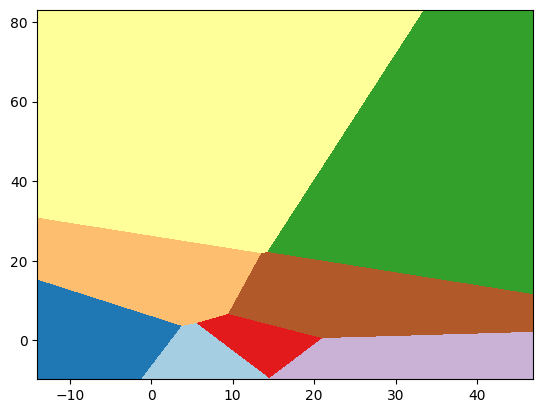

In [140]:
# Create a new figure for the plot
plt.figure()

# Clear the current figure (optional but ensures a clean slate)
plt.clf()

# Display the predicted cluster regions as an image
plt.imshow(
    Z,  # Matrix of predicted labels reshaped to match the grid
    interpolation='nearest',  # No smoothing between grid cells
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Define the spatial extent of the image
    cmap=plt.cm.Paired,  # Use a predefined colormap to distinguish clusters
    aspect='auto',  # Automatically adjust the aspect ratio
    origin='lower'  # Set the origin to the bottom-left corner
)